In [ ]:
pip install nltk

In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
vdata = pd.read_csv('Videos_data.csv')
vdata = vdata.iloc[:,1:]
vdata.head(10)

,Video Id,Title,Description,Category
0,ehmsJLZlCZ0,Ep 1| Travelling through North East India | Of...,"The journey to Arunachal, North East India beg...",travel
1,e2NQE41J5eM,How do I travel so much ! How do I earn money!!,SUBSCRIBE - https://goo.gl/dEtSMJ ('MountainTr...,travel
2,i9E_Blai8vk,TRAVEL VLOG ∙ Welcome to Bali | PRISCILLA LEE,I had the chance to fly out to Bali with my wh...,travel
3,#NAME?,GOA TRAVEL DIARY | FOUR DAYS IN GOA | TRAVEL O...,Hope you enjoy MY GOA TRAVEL DIARY this video!...,travel
4,7ByoBJYXU0k,5 Steps to Becoming a Travel Blogger,"Travel blogger, Nikki Vargas, of The Pin the M...",travel
5,yvn79Rv0F48,Backpacking In Meghalaya | NorthEast India Tri...,"In this video I explored North East India, sta...",travel
6,SL_YBLWdZb8,Welcome to Peru! | Best Essential Tips &amp; T...,Welcome to Peru! This essential travel guide w...,travel
7,kiNyRY5s7n8,How to Start a Travel Blog [2019] Travel Blogg...,Create a Travel Blog Website for Just $3.95 + ...,travel
8,kY41XgTEEQU,A Day with KSRTC Bus Fans - Aanavandi Travel B...,ആനവണ്ടി ഭ്രാന്തൻമാരോടൊപ്പം കുമളിയിൽ ഒരു ദിവസം ...,travel
9,7mIzRYh8jGA,What is it like to travel in PAKISTAN?,Subscribe now: https://goo.gl/6zXZGK Watch the...,travel


In [7]:
num_missing_desc = vdata.isnull().sum()[2]
print('Number of missing values in the video dataset (descriptions): '+str(num_missing_desc))
vdata = vdata.dropna()

Number of missing values in the video dataset (descriptions): 0


In [6]:
# objects to string
vdata['Title'] = vdata['Title'].map(lambda x: str(x))
vdata['Description'] = vdata['Description'].map(lambda x: str(x))
#change to lowercase
vdata['Title'] = vdata['Title'].map(lambda x: x.lower())
vdata['Description'] = vdata['Description'].map(lambda x: x.lower())
#remove numbers
vdata['Title'] = vdata['Title'].map(lambda x: re.sub(r'\d+','',x))
vdata['Description'] = vdata['Description'].map(lambda x: re.sub(r'\d+','',x))
#remove punctuation
vdata['Title'] = vdata['Title'].map(lambda x: x.translate(x.maketrans('', '',string.punctuation)))
vdata['Description'] = vdata['Description'].map(lambda x: x.translate(x.maketrans('', '',string.punctuation)))
#remove white spaces
vdata['Title'] = vdata['Title'].map(lambda x:x.strip())
vdata['Description'] = vdata['Description'].map(lambda x:x.strip())
#tokenize into words
vdata['Title'] = vdata['Title'].map(lambda x:word_tokenize(x))
vdata['Description'] = vdata['Description'].map(lambda x:word_tokenize(x))
#remove non alphabetic tokens
vdata['Title'] = vdata['Title'].map(lambda x:[word for word in x if word.isalpha()])
vdata['Description'] = vdata['Description'].map(lambda x:[word for word in x if word.isalpha()])
#filter out stop words
stop_word = set(stopwords.words('english'))
vdata['Title'] = vdata['Title'].map(lambda x:[word for word in x if not word in stop_word])
vdata['Description'] = vdata['Description'].map(lambda x:[word for word in x if not word in stop_word])
#word lemmatization
lem = WordNetLemmatizer()
vdata['Title'] = vdata['Title'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
vdata['Description'] = vdata['Description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
# Turn lists back to string
vdata['Title'] = vdata['Title'].map(lambda x: ' '.join(x))
vdata['Description'] = vdata['Description'].map(lambda x: ' '.join(x))

In [ ]:
vdata.head(10)

,Video Id,Title,Description,Category
0,ehmsJLZlCZ0,ep travel north east india arunachal journey b...,journey arunachal north east india begin train...,travel
1,e2NQE41J5eM,travel much earn money,subscribe httpsgoogldetsmj mountaintrekker gim...,travel
2,i9E_Blai8vk,travel vlog welcome bali priscilla lee,chance fly bali whole family thanksgiving firs...,travel
3,#NAME?,goa travel diary four days goa travel outfit i...,hope enjoy goa travel diary video dont forget ...,travel
4,7ByoBJYXU0k,step become travel blogger,travel blogger nikki vargas pin map project vo...,travel
5,yvn79Rv0F48,backpack meghalaya northeast india trip sohra ...,video explore north east india start guwahati ...,travel
6,SL_YBLWdZb8,welcome peru best essential tip amp travel guide,welcome peru essential travel guide show best ...,travel
7,kiNyRY5s7n8,start travel blog travel blogging fulltime,create travel blog website httpbitlyltstarttra...,travel
8,kY41XgTEEQU,day ksrtc bus fan aanavandi travel blog meet k...,ksrtc,travel
9,7mIzRYh8jGA,like travel pakistan,subscribe httpsgooglzxzgk watch full series ht...,travel


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
vdata.Category = le.fit_transform(vdata.Category)
vdata.head(10)

,Video Id,Title,Description,Category
0,ehmsJLZlCZ0,ep travel north east india arunachal journey b...,journey arunachal north east india begin train...,5
1,e2NQE41J5eM,travel much earn money,subscribe httpsgoogldetsmj mountaintrekker gim...,5
2,i9E_Blai8vk,travel vlog welcome bali priscilla lee,chance fly bali whole family thanksgiving firs...,5
3,#NAME?,goa travel diary four days goa travel outfit i...,hope enjoy goa travel diary video dont forget ...,5
4,7ByoBJYXU0k,step become travel blogger,travel blogger nikki vargas pin map project vo...,5
5,yvn79Rv0F48,backpack meghalaya northeast india trip sohra ...,video explore north east india start guwahati ...,5
6,SL_YBLWdZb8,welcome peru best essential tip amp travel guide,welcome peru essential travel guide show best ...,5
7,kiNyRY5s7n8,start travel blog travel blogging fulltime,create travel blog website httpbitlyltstarttra...,5
8,kY41XgTEEQU,day ksrtc bus fan aanavandi travel blog meet k...,ksrtc,5
9,7mIzRYh8jGA,like travel pakistan,subscribe httpsgooglzxzgk watch full series ht...,5


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_title = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tfidf_desc = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
labels = vdata.Category
features_title = tfidf_title.fit_transform(vdata.Title).toarray()
features_description = tfidf_desc.fit_transform(vdata.Description).toarray()
print('Title Features Shapes: '+str(features_title.shape))
print('Description Features Shape: ' + str(features_description.shape))

Title Features Shapes: (10333, 2708)
Description Features Shape: (10333, 4859)


<Axes: title={'center': 'Number of samples for each class'}>

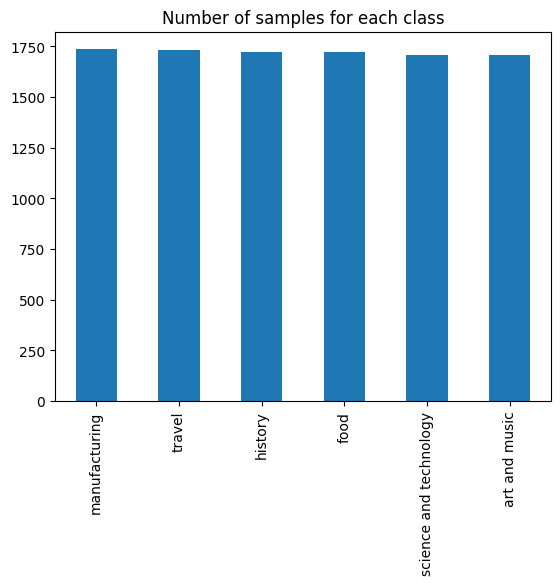

In [9]:
vdata['Category'].value_counts().sort_values(ascending=False).plot(kind='bar', y='Number of Samples', title='Number of samples for each class')

In [12]:
from sklearn.feature_selection import chi2
import numpy as np
N = 10
for current_class in list(le.classes_):
    current_class_id = le.transform([current_class])[0]
    features_chi2 = chi2(features_title, labels == current_class_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_title.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(current_class))
    print("Most correlated unigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(unigrams[-N:])))
    print("Most correlated bigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(bigrams[-N:])))
    print("\n")

# 'art and music':
Most correlated unigrams:
------------------------------
. filament
. filipino
. film
. filter
. fin
. final
. finally
. fine
. file
. 먹방
Most correlated bigrams:
------------------------------
. factory make
. factory tour
. fish eat
. food american
. food amp
. food challenge
. fine art
. femme sage
. food cook
. filipino snack


# 'food':
Most correlated unigrams:
------------------------------
. filament
. filipino
. film
. filter
. fin
. final
. finally
. fine
. file
. 먹방
Most correlated bigrams:
------------------------------
. factory make
. factory tour
. fish eat
. food american
. food amp
. food challenge
. fine art
. femme sage
. food cook
. filipino snack


# 'history':
Most correlated unigrams:
------------------------------
. filament
. filipino
. film
. filter
. fin
. final
. finally
. fine
. file
. 먹방
Most correlated bigrams:
------------------------------
. factory make
. factory tour
. fish eat
. food american
. food amp
. food challenge
. fine art


In [13]:
from sklearn.feature_selection import chi2
import numpy as np
N = 10
for current_class in list(le.classes_):
    current_class_id = le.transform([current_class])[0]
    features_chi2 = chi2(features_description, labels == current_class_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_desc.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(current_class))
    print("Most correlated unigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(unigrams[-N:])))
    print("Most correlated bigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(bigrams[-N:])))
    print("\n")

# 'art and music':
Most correlated unigrams:
------------------------------
. forward
. forum
. fortnite
. fort
. form
. forget
. forge
. forever
. forest
. कर
Most correlated bigrams:
------------------------------
. food videos
. food video
. food try
. food toy
. food tour
. forensic anthropologist
. forensic science
. forget subscribe
. forget like
. forensic anthropology


# 'food':
Most correlated unigrams:
------------------------------
. forward
. forum
. fortnite
. fort
. form
. forget
. forge
. forever
. forest
. कर
Most correlated bigrams:
------------------------------
. food videos
. food video
. food try
. food toy
. food tour
. forensic anthropologist
. forensic science
. forget subscribe
. forget like
. forensic anthropology


# 'history':
Most correlated unigrams:
------------------------------
. forward
. forum
. fortnite
. fort
. form
. forget
. forge
. forever
. forest
. कर
Most correlated bigrams:
------------------------------
. food videos
. food video
. food try

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(vdata.iloc[:, 1:3], vdata['Category'], random_state = 0)
X_train_title_features = tfidf_title.transform(X_train['Title']).toarray()
X_train_desc_features = tfidf_desc.transform(X_train['Description']).toarray()
features = np.concatenate([X_train_title_features, X_train_desc_features], axis=1)

In [ ]:
X_train.head()

,Title,Description
3072,lec mit introduction computer science program ...,lecture goals course computation introduction ...
713,travel cargo ship philippines,travel cargo ship yes something many people th...
3598,store cat food vs homemade,patreon httpswwwpatreoncomjunskitchen thank wa...
1680,indian tourism travel goa hd,create video youtube video editor httpwwwyoutu...
819,travel hong kong,heres hong kong vlog stay overnight airport vi...


In [ ]:
y_train.head()

3072    4
713     5
3598    1
1680    5
819     5
Name: Category, dtype: int64

In [15]:
# Naive Bayes
nb = MultinomialNB().fit(features, y_train)
# SVM
svm = linear_model.SGDClassifier(loss='modified_huber',max_iter=1000, tol=1e-3).fit(features,y_train)
# AdaBoost
adaboost = AdaBoostClassifier(n_estimators=40,algorithm="SAMME").fit(features,y_train)

In [21]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils import to_categorical

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 100

# Combining titles and descriptions into a single sentence
titles = vdata['Title'].values
descriptions = vdata['Description'].values
data_for_lstms = []
for i in range(len(titles)):
    temp_list = [titles[i], descriptions[i]]
    data_for_lstms.append(' '.join(temp_list))

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data_for_lstms)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Convert the data to padded sequences
X = tokenizer.texts_to_sequences(data_for_lstms)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

# One-hot Encode labels
Y = pd.get_dummies(vdata['Category']).values
print('Shape of label tensor:', Y.shape)

# Splitting into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42)

Found 26325 unique tokens.
Shape of data tensor: (10333, 50)
Shape of label tensor: (10333, 6)


In [22]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           2000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 50, 100)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
Total params: 2081006 (7.94 MB)
Trainable params: 2081006 (7.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [23]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/5
109/109 [==============================] - 40s 320ms/step - loss: 1.1188 - accuracy: 0.6111 - val_loss: 0.2402 - val_accuracy: 0.9497
Epoch 2/5
109/109 [==============================] - 22s 196ms/step - loss: 0.1235 - accuracy: 0.9730 - val_loss: 0.1267 - val_accuracy: 0.9781
Epoch 3/5
109/109 [==============================] - 17s 159ms/step - loss: 0.0561 - accuracy: 0.9892 - val_loss: 0.1311 - val_accuracy: 0.9768
Epoch 4/5
109/109 [==============================] - 18s 162ms/step - loss: 0.0379 - accuracy: 0.9911 - val_loss: 0.1120 - val_accuracy: 0.9819
Epoch 5/5
109/109 [==============================] - 17s 152ms/step - loss: 0.0274 - accuracy: 0.9934 - val_loss: 0.1167 - val_accuracy: 0.9845


In [31]:
X_train, X_test, y_train, y_test = train_test_split(vdata.iloc[:, 1:3], vdata['Category'], random_state = 0)
X_test_title_features = tfidf_title.transform(X_test['Title']).toarray()
X_test_desc_features = tfidf_desc.transform(X_test['Description']).toarray()
test_features = np.concatenate([X_test_title_features, X_test_desc_features], axis=1)

In [28]:
adata = pd.read_csv('collected_sports_data.csv' )
adata.head(10)
adata.drop(adata.iloc[:, 4:42], inplace = True, axis = 1)
adata.head(10)
adata['Title 1'] = adata['Title 1'].map(lambda x: x.lower())
adata['Meta Description 1'] = adata['Meta Description 1'].map(lambda x: x.lower())
adata['H1-1'] = adata['H1-1'].map(lambda x: x.lower())

# Remove Punctuation
adata['Title 1'] = adata['Title 1'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
adata['Meta Description 1'] = adata['Meta Description 1'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
adata['H1-1'] = adata['H1-1'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Remove white spaces
adata['Title 1'] = adata['Title 1'].map(lambda x: x.strip())
adata['Meta Description 1'] = adata['Meta Description 1'].map(lambda x: x.strip())
adata['H1-1'] = adata['H1-1'].map(lambda x: x.strip())

In [29]:
adata.head(10)

,Original Url,Title 1,Meta Description 1,H1-1
0,https://www.adforum.com/creative-work/ad/playe...,leos inner beauty,television inner beauty for leos by xynias wet...,leos inner beauty
1,https://www.adforum.com/creative-work/ad/playe...,ninemsn indian restaurant,television indian restaurant for ninemsn by ha...,ninemsn indian restaurant
2,https://www.adforum.com/creative-work/ad/playe...,social democratic party socialdemocratic party,television socialdemocratic party for social d...,social democratic party socialdemocratic party
3,https://www.adforum.com/creative-work/ad/playe...,the observer sport the 1st,television sport the 1st for the observer by o...,the observer sport the 1st
4,https://www.adforum.com/creative-work/ad/playe...,wind history has changed,television history has changed for wind by tbw...,wind history has changed
5,https://www.adforum.com/creative-work/ad/playe...,nestlé swimming,television swimming for nestlé by publicis ita...,nestlé swimming
6,https://www.adforum.com/creative-work/ad/playe...,nestlé sprint,television sprint for nestlé by publicis italy...,nestlé sprint
7,https://www.adforum.com/creative-work/ad/playe...,nestlé volley,television volley for nestlé by publicis italy...,nestlé volley
8,https://www.adforum.com/creative-work/ad/playe...,hertz tennis,television tennis for hertz by publicis mojo,hertz tennis
9,https://www.adforum.com/creative-work/ad/playe...,natural high,television natural high for by mccann brisbane,natural high


In [34]:
import pandas as pd
def find(dec,k):
    r=[]
    for i in dec.index:
        if k in dec['Meta Description 1'][i]:
            r.append(dec['Original Url'][i])
    return r


# Import Data
#adata = pd.read_csv('collected_sports_data.csv' )
adata=adata[['Original Url', 'Meta Description 1']]

#Search unigram keyword which is extracted from videos data.

result=find(adata, "travel")
for i in result:
    print(" Url Link ",i)

 Url Link  https://www.adforum.com/creative-work/ad/player/34458334/time-travel/directv
 Url Link  https://www.adforum.com/creative-work/ad/player/34465481/rugby-world/gullivers-sports-travel
 Url Link  https://www.adforum.com/creative-work/ad/player/34485545/travel/ole
 Url Link  https://www.adforum.com/creative-work/ad/player/34488240/new-zealand/expedia-com
 Url Link  https://www.adforum.com/creative-work/ad/player/34485545/travel/ole
 Url Link  https://www.adforum.com/creative-work/ad/player/34488240/new-zealand/expedia-com
 Url Link  https://www.adforum.com/creative-work/ad/player/34517107/leave-your-mark/under-armour
 Url Link  https://www.adforum.com/creative-work/ad/player/34518055/time-traveller/sky
 Url Link  https://www.adforum.com/creative-work/ad/player/34519534/do-it-for-mom/spies
 Url Link  https://www.adforum.com/creative-work/ad/player/34526061/travel-alberta-case-study-thrill/travel-alberta
 Url Link  https://www.adforum.com/creative-work/ad/player/34529381/relax-trav

In [ ]:
# Performance Evaluation
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

X_test_title_features = tfidf_title.transform(X_test['Title']).toarray()
X_test_desc_features = tfidf_desc.transform(X_test['Description']).toarray()
test_features = np.concatenate([X_test_title_features, X_test_desc_features], axis=1)

# Naive Bayes
y_pred = nb.predict(test_features)
y_probas = nb.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred,
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - Naive Bayes')
plt.show()

# Adaboost Classifier
y_pred = adaboost.predict(test_features)
y_probas = adaboost.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred,
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Adaboost Classifier')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - Adaboost Classifier')
plt.show()

# SVM
y_pred = svm.predict(test_features)
y_probas = svm.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred,
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SVM')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - SVM')
plt.show()